Sebastian Raschka, 2016  
`mlxtend`, a library of extension and helper modules for Python's data analysis and machine learning libraries

- GitHub repository: https://github.com/rasbt/mlxtend
- Documentation: http://rasbt.github.io/mlxtend/

View this page in [jupyter nbviewer](http://nbviewer.ipython.org/github/rasbt/mlxtend/blob/master/docs/sources/_ipynb_templates/regressor/linear_regression.ipynb)

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p matplotlib,numpy,scipy,mlxtend

Sebastian Raschka 
last updated: 2016-04-26 

CPython 3.5.1
IPython 4.0.3

matplotlib 1.5.1
numpy 1.11.0
scipy 0.17.0
mlxtend 0.4.1.dev0


In [2]:
%matplotlib inline

# TfKmeans

A implementation of k-means clustering in TensorFlow.

> from mlxtend.tf_cluster import TfKmeans

# Overview

Clustering falls into the category of unsupervised learning, a subfield of machine learning where the ground truth labels are not available to us in real-world applications. In clustering, our goal is to group samples by similarity (in k-means: Euclidean distance).

The k-means algorithms can be summarized as follows:

1. Randomly pick k centroids from the sample points as initial cluster centers.
2. Assign each sample to the nearest centroid $\mu(j), \; j \in {1,...,k}$.
3. Move the centroids to the center of the samples that were assigned to it.
4. Repeat steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance or a maximum number of iterations is reached.

### References


- MacQueen, J. B. (1967). [Some Methods for classification and Analysis of Multivariate Observations](http://projecteuclid.org/euclid.bsmsp/1200512992). Proceedings of 5th Berkeley Symposium on Mathematical Statistics and Probability. University of California Press. pp. 281–297. MR 0214227. Zbl 0214.46201. Retrieved 2009-04-07.

# Examples

## Example 1 - Three Blobs

#### Load some sample data:

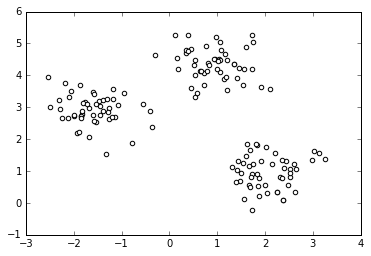

In [3]:
import matplotlib.pyplot as plt
from mlxtend.data import three_blobs_data

X, y = three_blobs_data()
plt.scatter(X[:, 0], X[:, 1], c='white')
plt.show()

#### Compute the cluster centroids:

In [4]:
from mlxtend.tf_cluster import TfKmeans

km = TfKmeans(k=3, 
              max_iter=50, 
              random_seed=1, 
              print_progress=3)

km.fit(X)

print('Iterations until convergence:', km.iterations_)
print('Final centroids:\n', km.centroids_)

Iteration: 2/50 | Elapsed: 00:00:00 | ETA: 00:00:00

Iterations until convergence: 2
Final centroids:
 [[-1.59473002  2.92236972]
 [ 2.06521749  0.96137404]
 [ 0.93296534  4.35420704]]


#### Visualize the cluster memberships:

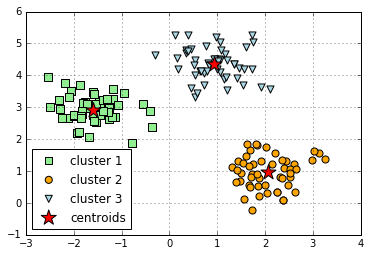

In [5]:
y_clust = km.predict(X)

plt.scatter(X[y_clust == 0, 0],
            X[y_clust == 0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1')

plt.scatter(X[y_clust == 1,0],
            X[y_clust == 1,1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')

plt.scatter(X[y_clust == 2,0],
            X[y_clust == 2,1],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3')


plt.scatter(km.centroids_[:,0],
            km.centroids_[:,1],
            s=250,
            marker='*',
            c='red',
            label='centroids')

plt.legend(loc='lower left', 
           scatterpoints=1)
plt.grid()
plt.show()

# API

In [44]:
with open('../../api_modules/mlxtend.tf_cluster/TfKmeans.md', 'r') as f:
    print(f.read())

## TfKmeans

*TfKmeans(k, max_iter=10, random_seed=None, print_progress=0, dtype=None)*

TensorFlow K-means clustering class.

    Added in 0.4.1dev

**Parameters**

- `k` : int

    Number of clusters

- `max_iter` : int (default: 10)

    Number of iterations during cluster assignment.
    Cluster re-assignment stops automatically when the algorithm
    converged.

- `random_seed` : int (default: None)

    Set random state for the initial centroid assignment.

- `print_progress` : int (default: 0)

    Prints progress in fitting to stderr.
    0: No output
    1: Iterations elapsed
    2: 1 plus time elapsed
    3: 2 plus estimated time until completion

- `dtype` : Array-type (default: None)

    Uses tensorflow.float32 if None.

**Attributes**

- `centroids_` : 2d-array, shape = {k, n_features}

    Feature values of the k cluster centroids.

- `custers_` : dictionary

    The cluster assignments stored as a Python dictionary;
    the dictionary keys denote the cluster indeces and